In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
from shapely.geometry import  Point
from shapely import wkt

**Given Data is from 2020 - 2024 for all Electric Vehicle over whole United States**

In [107]:
vehicle_df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [108]:
usa_map = gpd.read_file('ne_10m_admin_1_states_provinces_lines.dbf')

### Step 1 is understanding all the data , Finding Missing Values and drawing inferences 

In [109]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [110]:
vehicle_df['Make'].unique()

array(['TESLA', 'JEEP', 'BMW', 'TOYOTA', 'NISSAN', 'CHEVROLET', 'SMART',
       'KIA', 'FORD', 'LINCOLN', 'HYUNDAI', 'AUDI', 'VOLVO', 'FIAT',
       'MAZDA', 'VOLKSWAGEN', 'RIVIAN', 'HONDA', 'MITSUBISHI', 'POLESTAR',
       'CHRYSLER', 'MINI', 'JAGUAR', 'MERCEDES-BENZ', 'SUBARU',
       'CADILLAC', 'ALFA ROMEO', 'DODGE', 'LEXUS', 'PORSCHE', 'GENESIS',
       'LUCID', 'FISKER', 'LAND ROVER', 'GMC', 'ACURA', 'BENTLEY',
       'AZURE DYNAMICS', 'TH!NK', 'WHEEGO ELECTRIC CARS', 'ROLLS-ROYCE',
       'RAM'], dtype=object)

In [111]:
vehicle_df.shape

(200048, 17)

In [112]:
vehicle_df['Model Year'].unique()

array([2019, 2023, 2020, 2018, 2022, 2012, 2011, 2015, 2016, 2014, 2021,
       2017, 2013, 2024, 2010, 2025, 2008, 2000, 2002, 1999, 2003, 1997])

In [113]:
vehicle_df['Model Year'].unique().max()

np.int64(2025)

In [114]:
vehicle_df[vehicle_df['Model Year']==2025]
# Model Year Can be 2025

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
3105,JM3KJEHA7S,Snohomish,Lake Stevens,WA,98258.0,2025,MAZDA,CX-70,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,44.0,269547729,POINT (-122.0816912 48.0122934),PUGET SOUND ENERGY INC,5.306105e+10
3150,WBY13HG00S,King,Bellevue,WA,98004.0,2025,BMW,I5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,267184340,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4041,5UX43EU02S,King,Burien,WA,98146.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,34.0,267942132,POINT (-122.3551826 47.5000521),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
6853,JTJHKCFZ9S,Clark,Vancouver,WA,98685.0,2025,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,49.0,269361074,POINT (-122.688741 45.711311),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
10432,JTJKKCFZ0S,King,Seattle,WA,98146.0,2025,LEXUS,NX,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37,0,34.0,269408968,POINT (-122.3551826 47.5000521),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195444,WBY13HG08S,Clark,Camas,WA,98607.0,2025,BMW,I5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,18.0,268003956,POINT (-122.4220033 45.6092439),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
196276,5UX43EU00S,Pierce,Tacoma,WA,98402.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,27.0,269668248,POINT (-122.4408459 47.2499623),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
196304,WB523CF09S,Whatcom,Point Roberts,WA,98281.0,2025,BMW,IX,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,268965161,POINT (-123.0602177 48.9910612),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
197298,5UX43EU04S,Pierce,Puyallup,WA,98371.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40,0,25.0,268076980,POINT (-122.3119354 47.1990211),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305394e+10


1. Note that the make year ranges from 1997 to 2025  For Electric Vehicle Data 

In [115]:
vehicle_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

* Notice that the state of washington is common for all the vehicles 

*Analyzisng the Missing Values*

In [116]:
vehicle_df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

* Apart from Legislative District all the Null Values are not significant to be dealt with 

In [117]:
vehicle_df['Legislative District'].unique()

array([21., 15., 23., 26., 44., 36.,  2., 45., 22., 14., 47., 41.,  1.,
       10., 46., 48.,  5., 37., 33., 35., 32., 39., 38., 43., 13., 20.,
       34., 12., 40., 11., 30., 16., nan,  7.,  3.,  9., 42., 49., 18.,
       19., 17., 24., 31.,  8.,  4.,  6., 27., 25., 28., 29.])

In [118]:
vehicle_df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

1. It becomes really important to understand the importance of `CAFV` , `Electric Vehicle Type`

In [119]:
vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [120]:
vehicle_df['Electric Utility'].unique()

array(['PUGET SOUND ENERGY INC', 'PACIFICORP',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'PUD NO 2 OF GRANT COUNTY', 'PUD NO 1 OF CHELAN COUNTY',
       'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY', nan,
       'AVISTA CORP', 'NON WASHINGTON STATE ELECTRIC UTILITY',
       'MODERN ELECTRIC WATER COMPANY', 'PUD NO 1 OF WHATCOM COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'NO KNOWN ELECTRIC UTILITY SERVICE',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PACIFICORP||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||

In [121]:
vehicle_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [122]:
vehicle_df['Base MSRP'].unique()

array([     0,  69900,  44100,  53400,  31950,  64950,  59900,  34995,
        52900,  54950,  36800,  36900,  55700,  52650,  45600,  33950,
       110950,  81100,  39995, 184400,  32250,  91250,  43700,  98950,
        90700,  89100, 102000, 109000,  32995, 845000,  75095])

In [123]:
(vehicle_df['Base MSRP']>0).sum()

np.int64(3321)

In [124]:
vehicle_df['County'].unique()

array(['Snohomish', 'Yakima', 'Kitsap', 'King', 'Thurston', 'Island',
       'Grant', 'Skagit', 'Chelan', 'Whatcom', 'Pierce', 'Walla Walla',
       nan, 'Kittitas', 'Stevens', 'Douglas', 'Maricopa', 'Tooele',
       'Spokane', 'Whitman', 'Clark', 'Cowlitz', 'Jefferson', 'Klickitat',
       'Clallam', 'Benton', 'Pacific', 'Franklin', 'San Juan', 'Mason',
       'Lewis', 'Grays Harbor', 'Okanogan', 'San Diego', 'Skamania',
       'Lincoln', 'Adams', "St. Mary's", 'Yuba', 'Galveston', 'Saratoga',
       'Pend Oreille', 'Alexandria', "Prince George's", 'Ada',
       'James City', 'Virginia Beach', 'Santa Clara', 'Arapahoe',
       'Rockdale', 'Wahkiakum', 'Asotin', 'Cook', 'Riverside', 'Solano',
       'Suffolk', 'Chesapeake', 'St. Louis', 'Fairfax', 'Anne Arundel',
       'Harford', 'Prince William', 'Muscogee', 'San Mateo', 'DuPage',
       'Madison', 'Howard', 'Pima', 'Pinal', 'Washtenaw', 'Orange',
       'Marin', 'San Bernardino', 'Brown', 'Washoe', 'Lake', 'Churchill',
       'York'

In [125]:
vehicle_df['State'].unique()


array(['WA', 'AE', 'CO', 'AZ', 'UT', 'CA', 'MD', 'TX', 'NY', 'VA', 'ID',
       'GA', 'IL', 'MO', 'MI', 'NV', 'WI', 'AL', 'NC', 'SC', 'OR', 'NE',
       'PA', 'KY', 'DE', 'OH', 'HI', 'KS', 'FL', 'IN', 'BC', 'NM', 'IA',
       'LA', 'OK', 'DC', 'CT', 'NJ', 'WY', 'RI', 'MA', 'AR', 'AK', 'NH',
       'MN'], dtype=object)

**Note that there are total of 45 States in Datasets**
1. (-122.29943 47.912654): These are the latitude and longitude coordinates,
2. 5.306104e+10 2020 Census Tract likely refers to a specific 2020 Census Tract identified by a unique numerical code of 53,061,040,000. 

In [126]:
vehicle_df['2020 Census Tract'].unique().shape
# There are 2162 Unique Values Corresponding to the UNIQUE ID'S of 2020 census Tract 

(2162,)

In [127]:
# Creating Separate Data Set For Tesla 
tesla_df=pd.DataFrame(vehicle_df[vehicle_df['Make']=='TESLA'])

In [128]:
tesla_df.head(20)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
5,5YJYGDEF8L,King,Seattle,WA,98107.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,36.0,112984833,POINT (-122.3788863 47.6702397),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
13,5YJ3E1EA3K,King,Auburn,WA,98092.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,47.0,180476327,POINT (-122.1550193 47.2884536),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
19,5YJ3E1EA4K,Snohomish,Everett,WA,98204.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,21.0,478330212,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
20,7SAYGAEE2P,King,Seattle,WA,98115.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,257782626,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
22,5YJ3E1EB0J,King,Kirkland,WA,98033.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,48.0,347638196,POINT (-122.1925969 47.676241),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
23,5YJ3E1EB4L,King,Bellevue,WA,98004.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,48.0,7829405,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
24,5YJ3E1EB3J,King,Seattle,WA,98133.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,46.0,475606708,POINT (-122.342434 47.736655),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
28,5YJ3E1EA0L,King,Bellevue,WA,98004.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,48.0,4821442,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
29,5YJ3E1EA4J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,48.0,345522005,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [129]:
tesla_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

*Thus it can be concluded that almost all the Tesla are `CAFV` eligible*

<Axes: xlabel='Model', ylabel='Electric Range'>

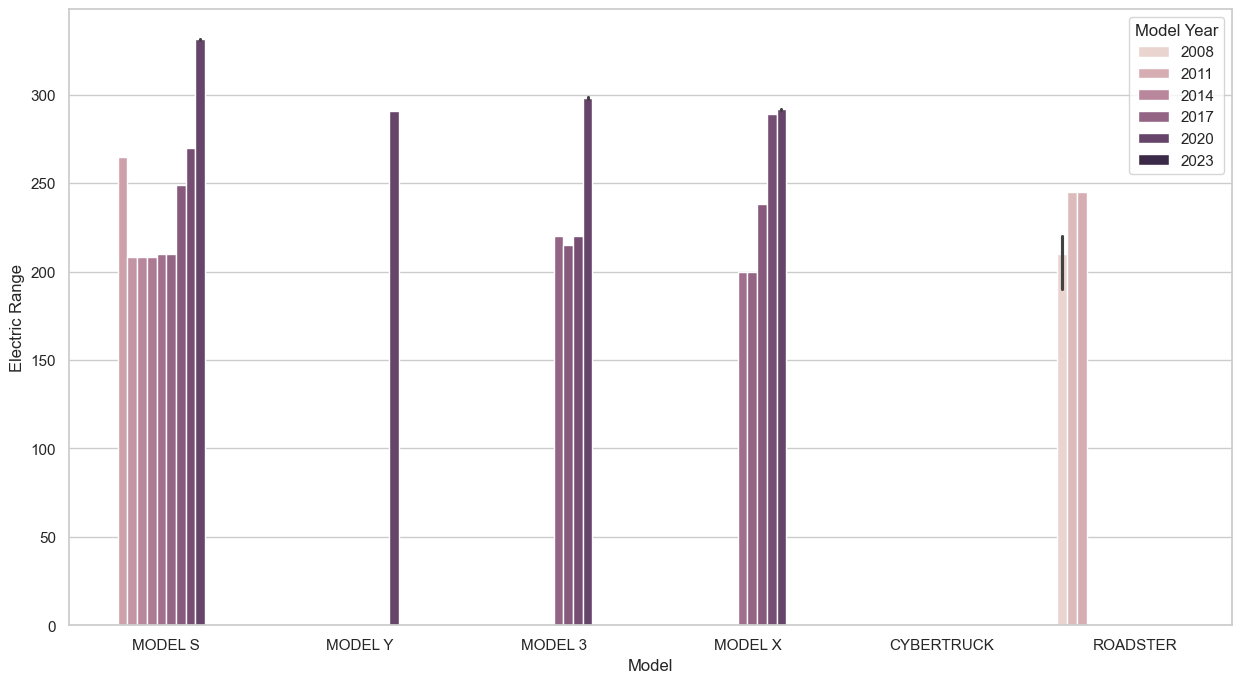

In [130]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=tesla_df)

 1. It is ClearlyVisible that the range of Each Model Imporves overtime 
 2. Cybertruck are not yet fully deleivered enough data is not available on them

In [131]:
tesla_df['Model']=='MODEL S'  # This returns the boolean Seires 

0          True
5         False
13        False
19        False
20        False
          ...  
200033    False
200036    False
200038    False
200041    False
200047    False
Name: Model, Length: 88083, dtype: bool

In [132]:
# Where as this returns 
# Data Frame Based on Filtering using the Boolean Series 
tesla_df[tesla_df['Model']=='MODEL S']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
59,5YJSA1DP8D,Snohomish,Stanwood,WA,98292.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,10.0,111162012,POINT (-122.326873 48.2144825),PUGET SOUND ENERGY INC,5.306105e+10
60,5YJSA1E29H,Thurston,Olympia,WA,98502.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,148198326,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
77,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,15.0,258112970,POINT (-120.5517376 46.6678647),PACIFICORP,5.307700e+10
109,5YJSA1E41J,Thurston,Olympia,WA,98502.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,22.0,193795542,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199930,5YJSA1DP8D,Pierce,Fife,WA,98424.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,25.0,164806771,POINT (-122.3538141 47.2365279),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
199957,5YJSA1E28J,Snohomish,Stanwood,WA,98292.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,10.0,198794410,POINT (-122.326873 48.2144825),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.306105e+10
199966,5YJSA1H11E,Pierce,Edgewood,WA,98371.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,31.0,306854019,POINT (-122.3119354 47.1990211),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305394e+10
199974,5YJSA1E5XN,Snohomish,Snohomish,WA,98290.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,219562703,POINT (-122.0483457 47.9435765),PUGET SOUND ENERGY INC,5.306105e+10


**Note that it is important to use `figsize` Attribute before implementing the graph**

### Results in Wrong Diagram due to wrong estimator 
`estimator=mean` by default

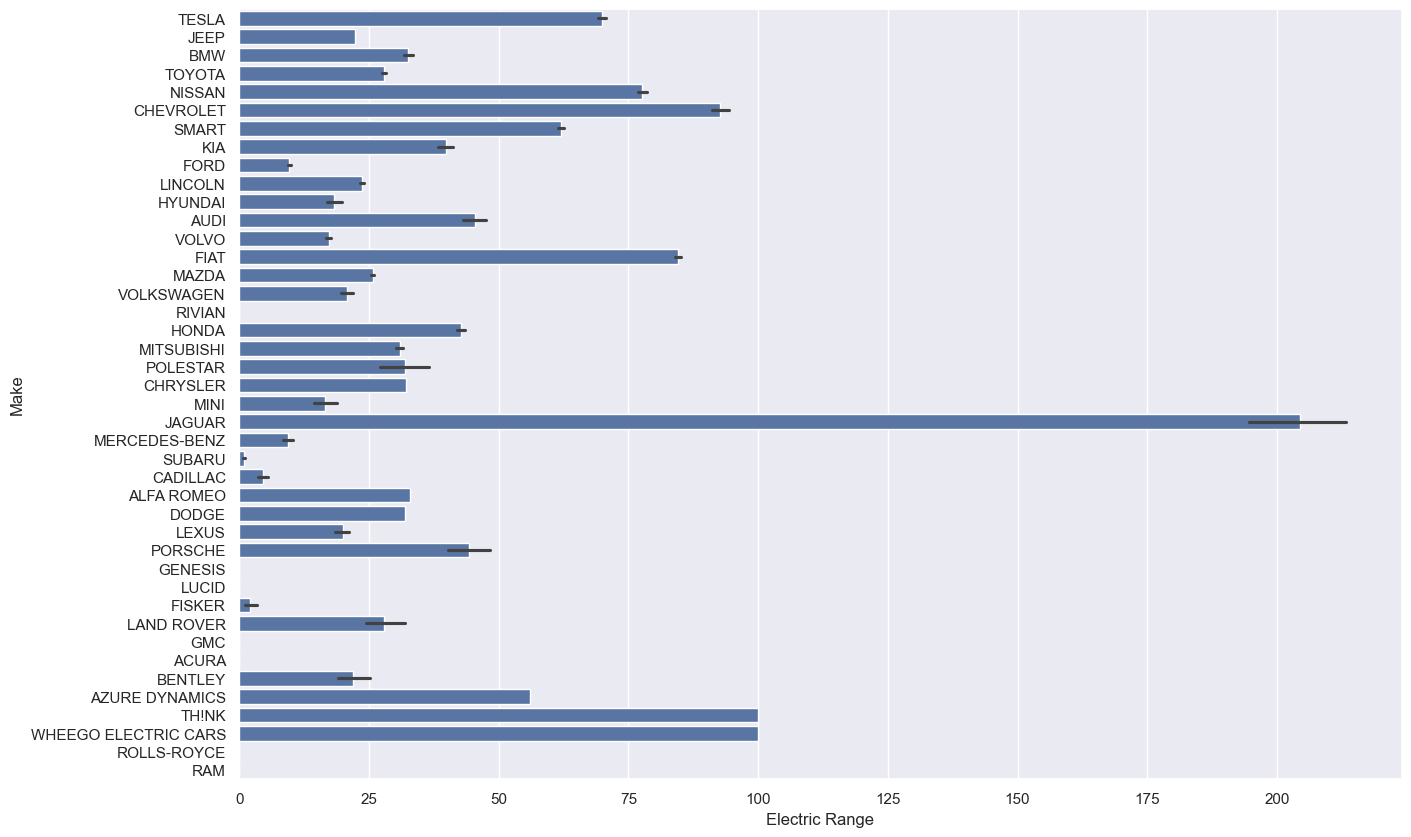

In [133]:
# We will comapre overall range using the makers for the whole data set 
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='Electric Range',y='Make',data=vehicle_df)
sns.set_theme()

In [134]:
# Let Check the Maximum Range in Whole Data-Set
vehicle_df[vehicle_df['Electric Range']==337]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1675,5YJSA1E41L,King,Bellevue,WA,98005.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,48.0,261155807,POINT (-122.167394 47.614119),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2968,5YJSA1E48L,Clark,Vancouver,WA,98683.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,17.0,231099067,POINT (-122.515805 45.604689),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4213,5YJSA1E41L,King,Auburn,WA,98001.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,47.0,143887173,POINT (-122.2651204 47.3164638),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9752,5YJSA1E4XL,Clark,Vancouver,WA,98664.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,49.0,124659167,POINT (-122.575383 45.620105),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
10020,5YJSA1E42L,Snohomish,Mill Creek,WA,98012.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,44.0,104642107,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178557,5YJSA1E45L,Cowlitz,Woodland,WA,98674.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,20.0,4914794,POINT (-122.7050688 45.9237749),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301500e+10
182418,5YJSA1E41L,King,Carnation,WA,98014.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,5.0,123160026,POINT (-121.921987 47.65881),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
190000,5YJSA1E41L,Spokane,Spokane,WA,99223.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,6.0,132182620,POINT (-117.3600492 47.6077423),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306300e+10
190539,5YJSA1E45L,Kitsap,Bainbridge Island,WA,98110.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,23.0,255449582,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10


**Although in the whole data set the maximum range is of the Tesla Model S However when we plot it the Maximum appears to be of Jaguar**

In [135]:
vehicle_df[vehicle_df['Make']=='TESLA'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,88081.000000,88083.000000,88083.000000,88083.000000,87860.000000,8.808300e+04,8.808100e+04
mean,98137.330991,2021.273730,69.933699,1221.034138,29.657375,2.256225e+08,5.296627e+10
std,2546.130245,2.377459,111.334139,9219.893538,15.391501,7.647297e+07,1.713178e+09
min,1731.000000,2008.000000,0.000000,0.000000,1.000000,2.462900e+04,1.081042e+09
25%,98037.000000,2020.000000,0.000000,0.000000,18.000000,1.865772e+08,5.303302e+10
50%,98109.000000,2022.000000,0.000000,0.000000,34.000000,2.329354e+08,5.303303e+10
75%,98332.000000,2023.000000,208.000000,0.000000,43.000000,2.603785e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,110950.000000,49.000000,4.791150e+08,5.602100e+10


In [136]:
vehicle_df[vehicle_df['Make']=='JAGUAR'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,238.000000,238.000000,238.000000,238.0,238.000000,2.380000e+02,2.380000e+02
mean,98272.252101,2019.840336,204.504202,0.0,27.966387,1.880207e+08,5.304090e+10
std,317.817749,1.208152,77.829726,0.0,15.040835,1.090996e+08,1.645835e+07
min,98001.000000,2019.000000,0.000000,0.0,1.000000,1.864432e+06,5.300501e+10
25%,98034.000000,2019.000000,234.000000,0.0,17.000000,1.158338e+08,5.303302e+10
50%,98155.000000,2020.000000,234.000000,0.0,31.000000,1.794346e+08,5.303303e+10
75%,98374.000000,2020.000000,234.000000,0.0,41.000000,2.571789e+08,5.305372e+10
max,99354.000000,2024.000000,234.000000,0.0,49.000000,4.775598e+08,5.307500e+10


### LEARNINGS :
1. Although we know that the maximum range is of Tesla Model s but due to many zero values in the tesla_df the mean comes out to be around `69`
2. Although Jaguar does not have max range due to less zero values in jaguar_df its mean is far more higher `214` 

Therefore using mean to plot the graph is not an appropriate quantity to measure such factor 

<Axes: xlabel='Electric Range', ylabel='Make'>

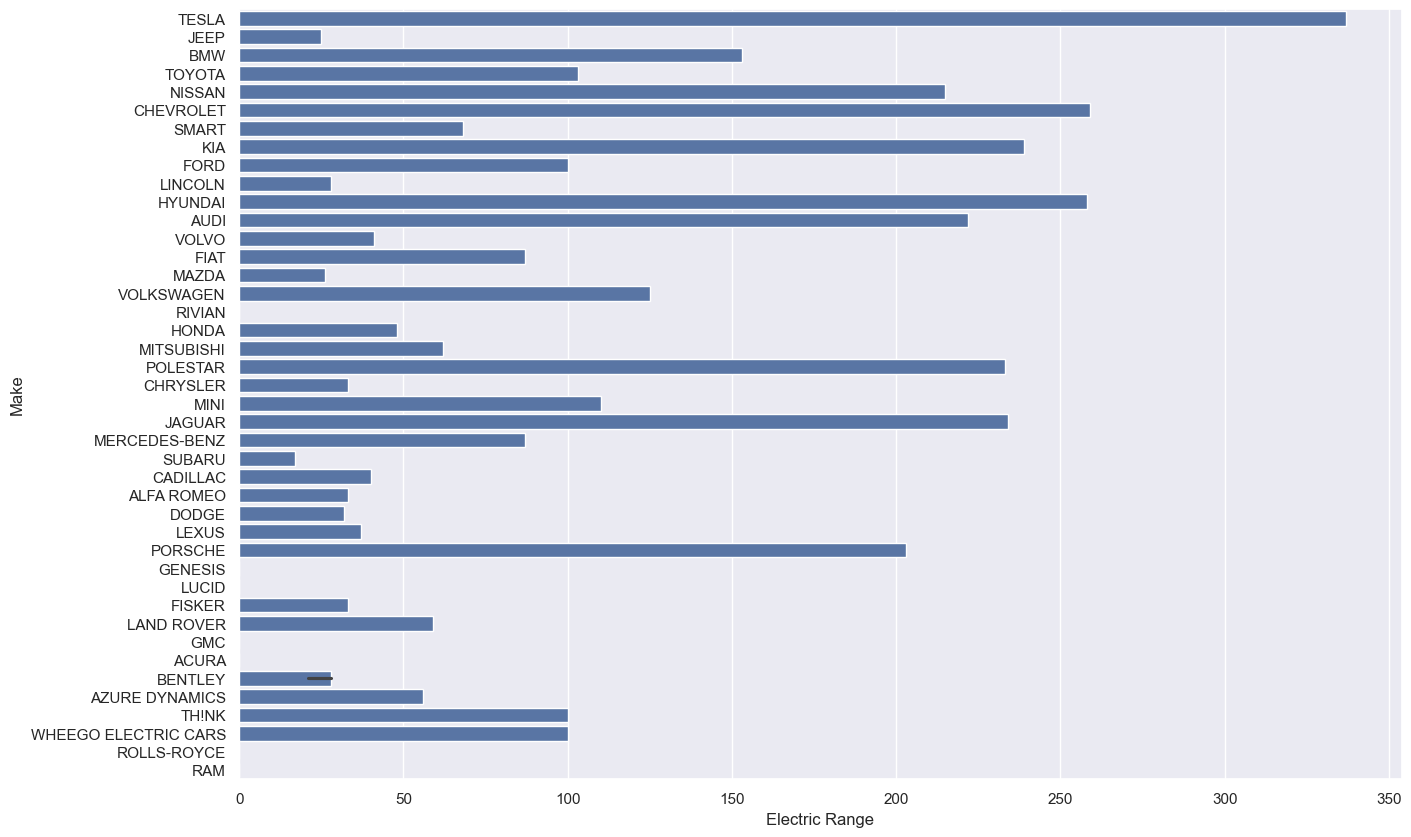

In [137]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='Electric Range',y='Make',data=vehicle_df,estimator=max)


**It is Clearly Visible that Using appropriate factors to calculate the parameters by using the and analysing the data set is very important**

<Axes: xlabel='Model', ylabel='Electric Range'>

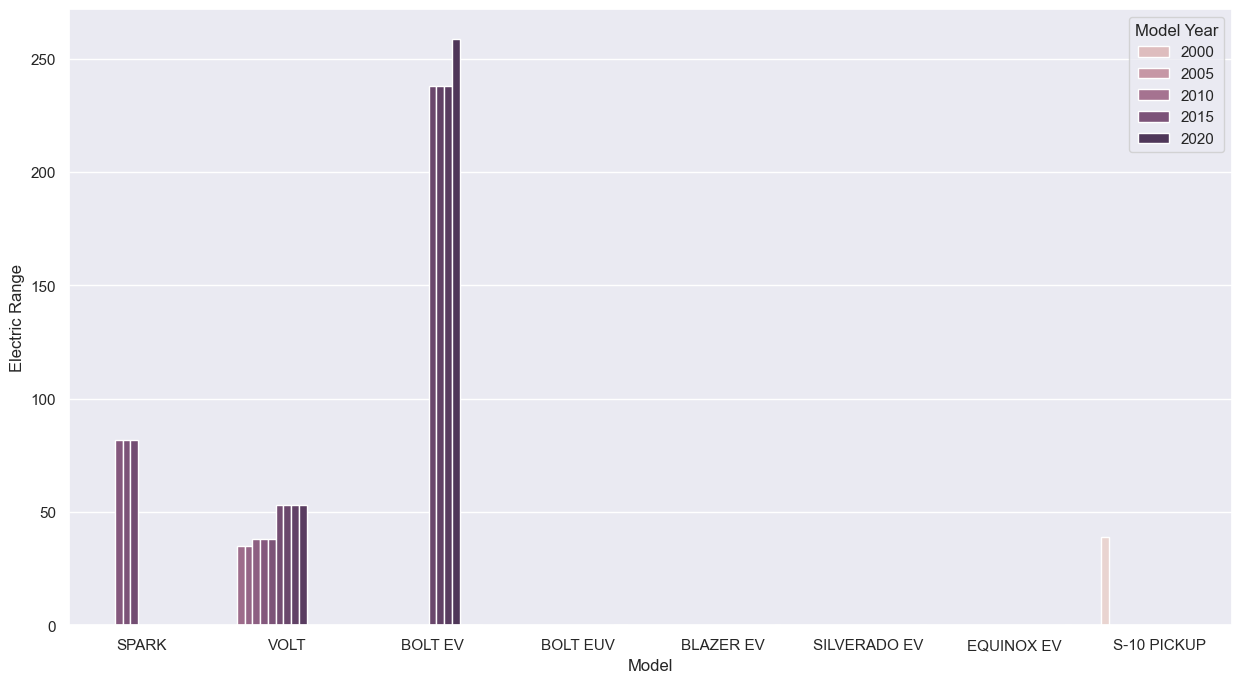

In [138]:
# Analysing the Second Best Car Provider in Electirc Range (Chevorlet)
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=vehicle_df[vehicle_df['Make']=='CHEVROLET'])

<Axes: xlabel='Model', ylabel='Electric Range'>

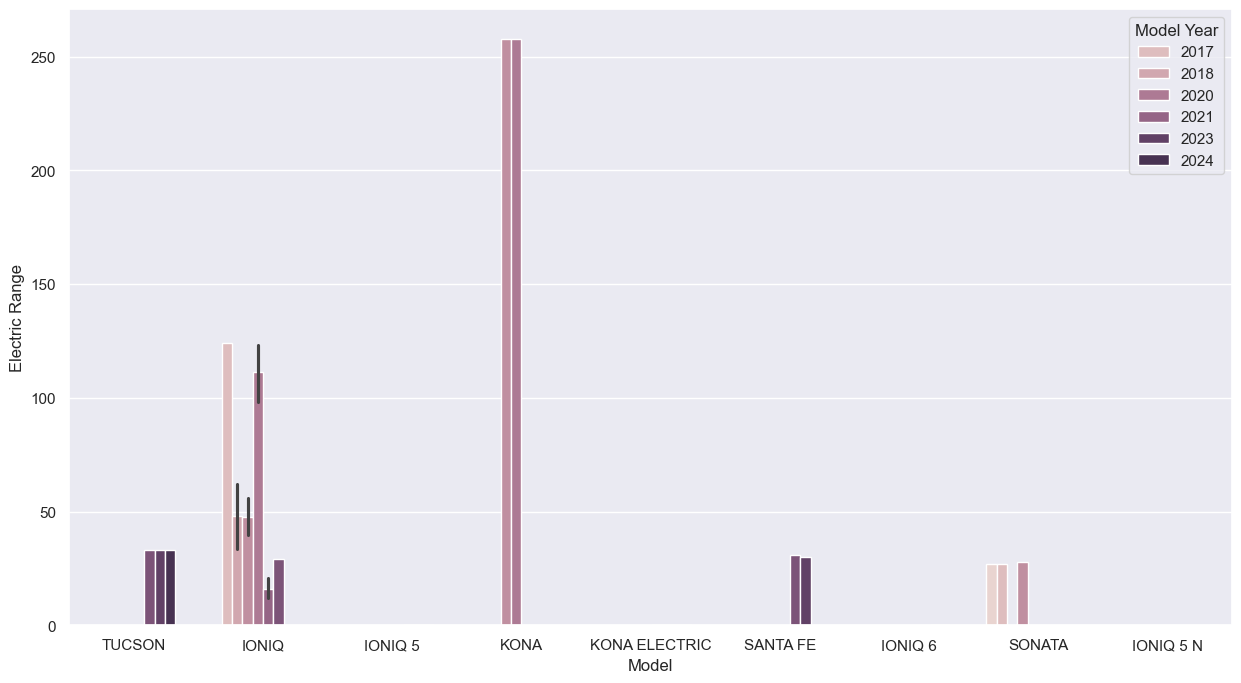

In [139]:
# Plotting the Same for Hyundai 
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=vehicle_df[vehicle_df['Make']=='HYUNDAI'])

<Axes: xlabel='Model', ylabel='Electric Range'>

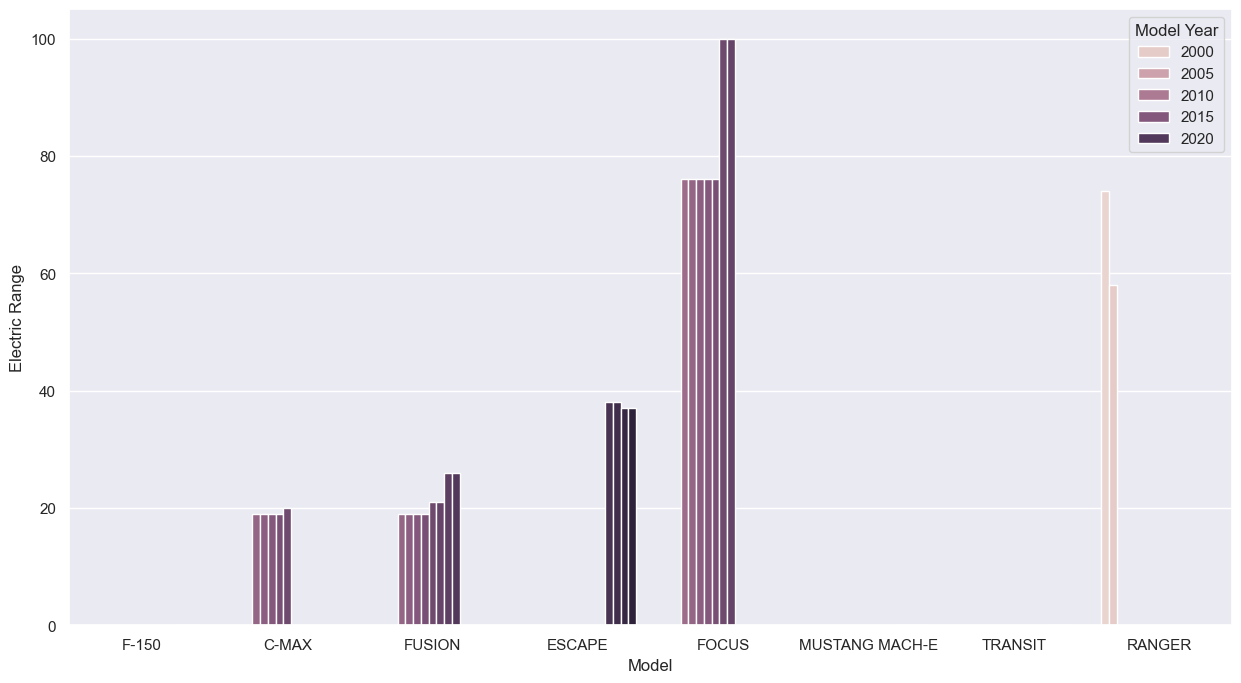

In [140]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Electric Range', hue='Model Year', data=vehicle_df[vehicle_df['Make']=='FORD'])

In [141]:
vehicle_df[vehicle_df['Make']=='FORD']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
15,1FTVW1EV4P,Snohomish,Mill Creek,WA,98012.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,44.0,224463865,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
21,1FADP5CU2G,Kitsap,Bainbridge Island,WA,98110.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,23.0,477705252,POINT (-122.5305071 47.6400595),PUGET SOUND ENERGY INC,5.303509e+10
41,1FADP5CU0G,Kitsap,Kingston,WA,98346.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,23.0,1465033,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
50,3FA6P0SU2G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,35.0,198573294,POINT (-122.8733203 47.0133209),PUGET SOUND ENERGY INC,5.306701e+10
61,3FA6P0SU8L,Snohomish,Bothell,WA,98012.0,2020,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,1.0,150125713,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199976,3FMTK3SU3P,Clallam,Sequim,WA,98382.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,24.0,261797791,POINT (-123.1090862 48.0805816),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
199978,3FMTK3SU2P,Whatcom,Lynden,WA,98264.0,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,42.0,259172392,POINT (-122.4537492 48.9425893),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
199981,1FADP5CU6G,Pierce,Tacoma,WA,98404.0,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,25.0,196380117,POINT (-122.414395 47.209008),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10
200012,3FMTK3SU7N,Snohomish,Everett,WA,98208.0,2022,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,38.0,206962472,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [142]:
vehicle_df[vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Eligibility unknown as battery range has not been researched'].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109401.000000,109401.000000,109401.0,109401.0,109193.000000,1.094010e+05,1.094010e+05
mean,98169.708632,2022.666146,0.0,0.0,29.327255,2.328471e+08,5.298111e+10
std,2210.100752,0.915459,0.0,0.0,15.097224,3.379973e+07,1.547762e+09
min,1731.000000,2008.000000,0.0,0.0,1.000000,1.028289e+08,1.001020e+09
25%,98040.000000,2022.000000,0.0,0.0,18.000000,2.148814e+08,5.303301e+10
50%,98116.000000,2023.000000,0.0,0.0,33.000000,2.415949e+08,5.303303e+10
75%,98346.000000,2023.000000,0.0,0.0,43.000000,2.606348e+08,5.305307e+10
max,99577.000000,2025.000000,0.0,0.0,49.000000,3.453611e+08,5.602100e+10


It Becomes Important to notice that all the vehicle with zero range have not actually been researched yet 

## Adding Longitude and Latitude Points Using WKT Data  
*Using the `Shapely` Module to parse the WKT Points into Latitudes and Longitudes*


In [143]:
# vehicle_df['Vehicle Location'].info()

<!--The bel -->

**The below code is optimised such that when a `NaN` value is encountered it appends None Value to it else adds the point values to list** 

In [144]:
# POINT (-122.206146 47.839957)
# POINT (x,y) --> (long,latitude) point pairs 
longitutes =[]
latitudes =[]

location=vehicle_df['Vehicle Location'].to_list()
for wkt_point in location:
	if isinstance(wkt_point, str):
		point = wkt.loads(wkt_point)
		longitutes.append(point.x)
		latitudes.append(point.y)
	else:
		longitutes.append(None)
		latitudes.append(None)


In [145]:
longitutes[:10]

[-122.29943,
 -120.4688751,
 -122.5178351,
 -122.6530052,
 -122.2032349,
 -122.3788863,
 -122.6771414,
 -122.1925969,
 -122.1925969,
 -122.86491]

In [146]:
latitudes[:10]

[47.912654,
 46.6046178,
 47.7981436,
 47.4739066,
 47.8956271,
 47.6702397,
 46.8882415,
 47.676241,
 47.676241,
 47.07503]

**Plotting Basic Scatter plot without Boundaries in Seaborn and Matplotlib**

<function matplotlib.pyplot.show(close=None, block=None)>

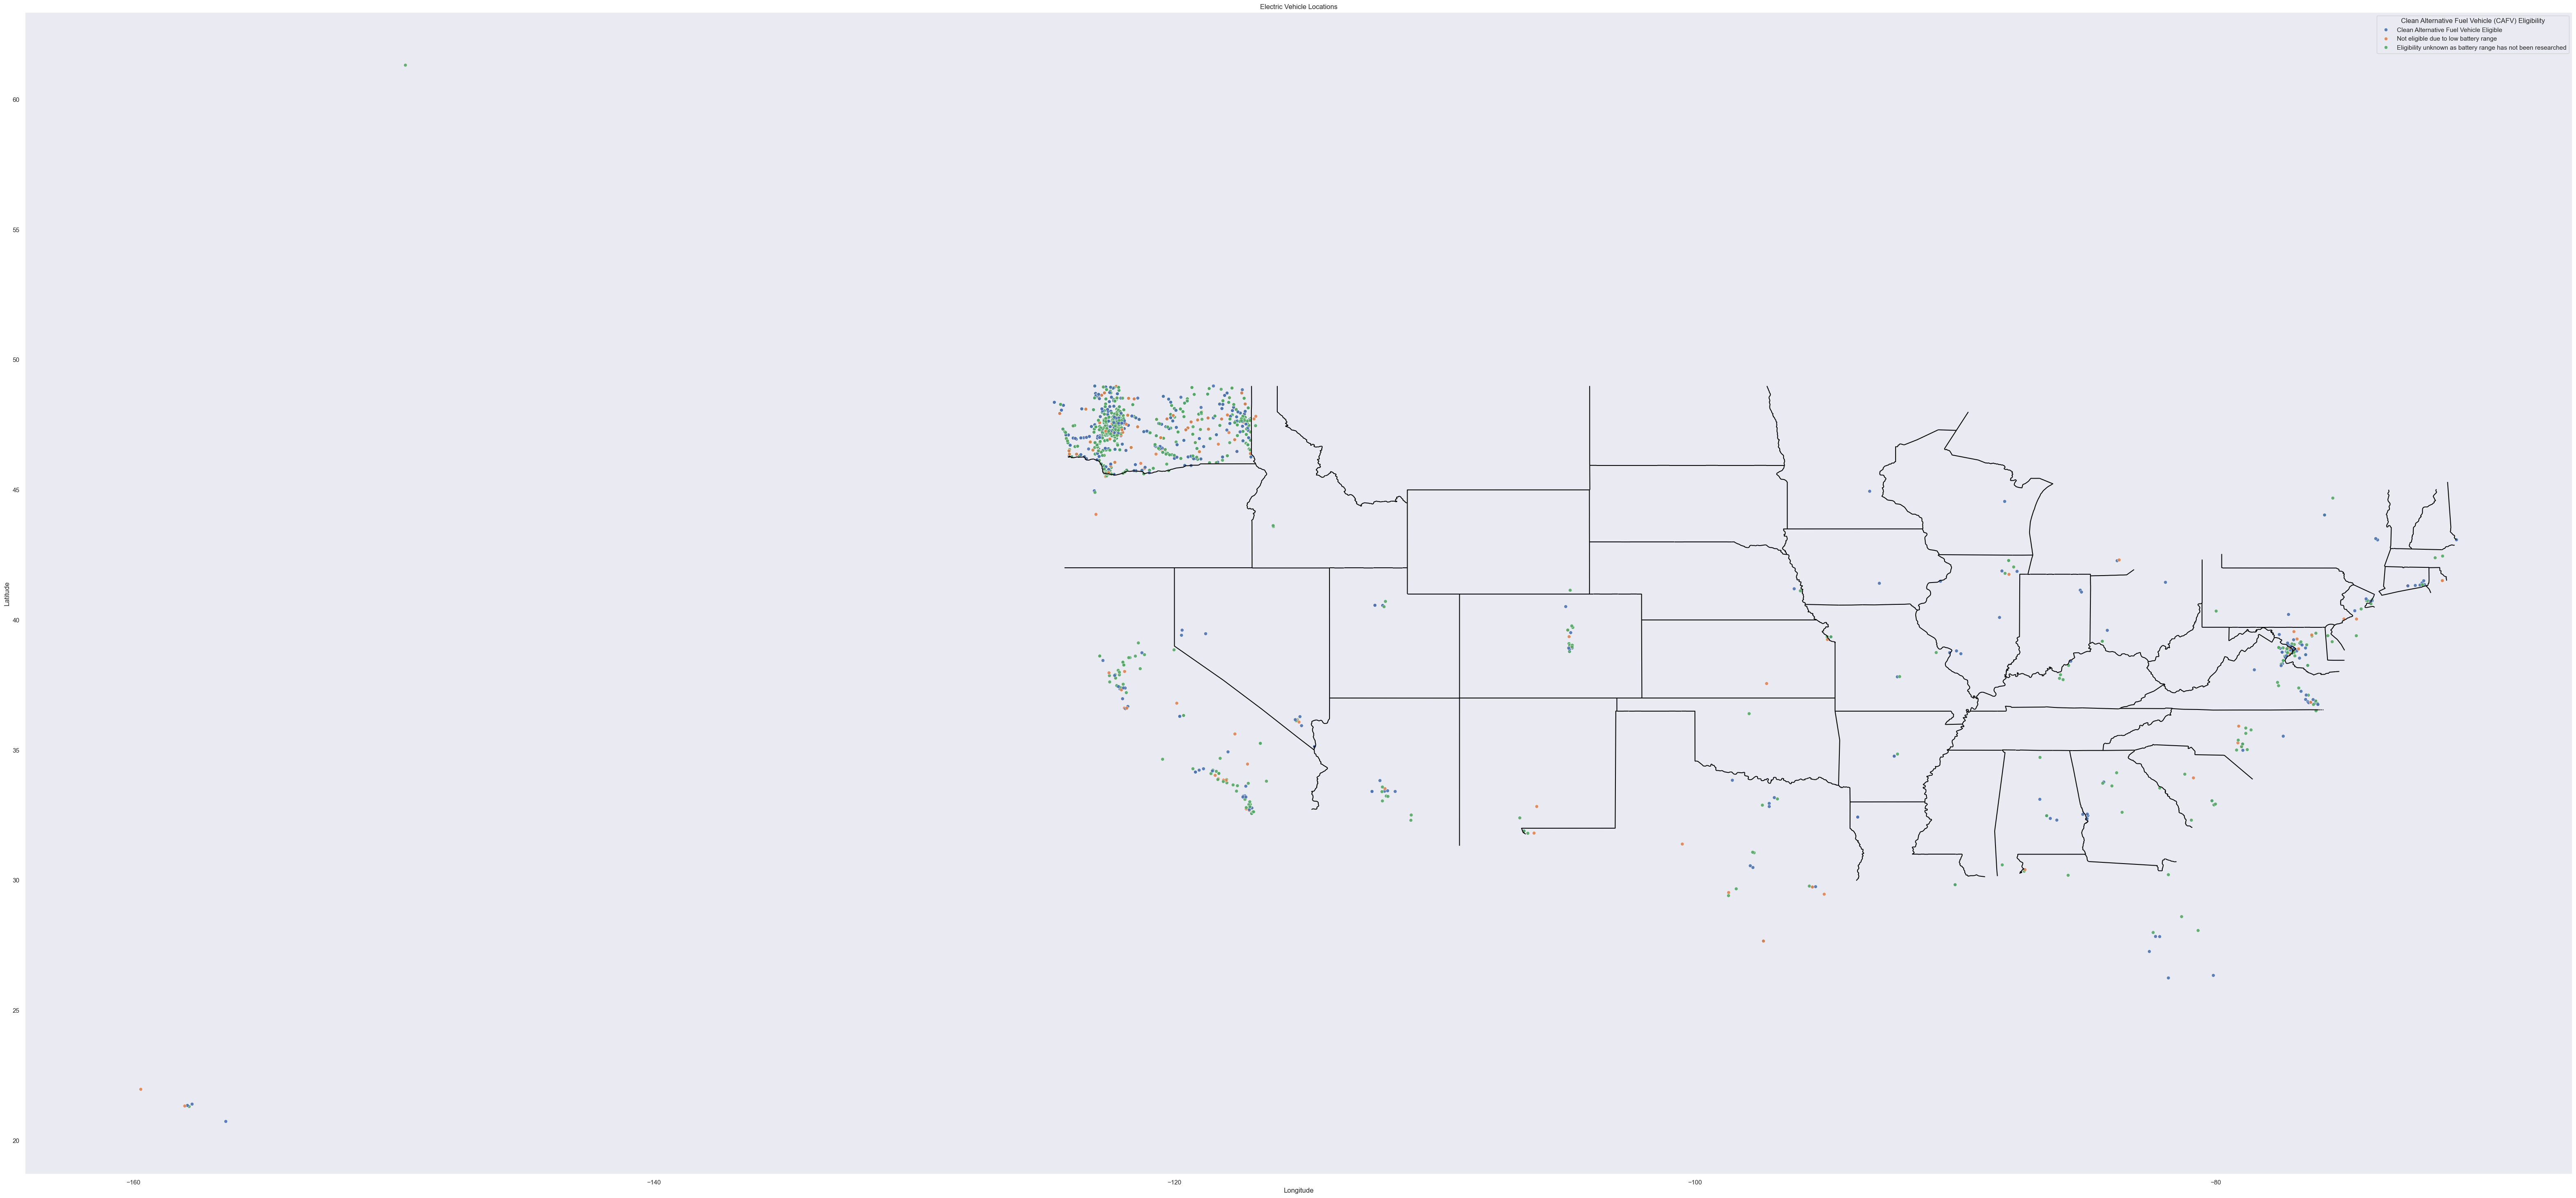

In [167]:
plt.figure(figsize=(80,50))
sns.scatterplot(x=longitutes, y=latitudes, alpha=0.9,hue=vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.title("Electric Vehicle Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)
usa_map[usa_map['ADM0_A3']=='USA'].plot(ax=plt.gca(), color='BLACK', edgecolor='black', alpha=1)
plt.show

In [159]:
usa_map[usa_map['ADM0_A3']=='USA']

,FEATURECLA,NAME,ADM0_A3,ADM0_NAME,SHAPE_LENG,MAPCOLOR13,MAPCOLOR9,SOV_A3,NAME_L,NAME_R,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,ne_id,BRK_A3,FCLASS_OSM,FCLASS_TLC,geometry
84,Admin-1 boundary,None,USA,United States of America,12.745484,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746709645,None,None,None,"LINESTRING (-75.37738 38.0152, -75.26303 38.02..."
541,Admin-1 boundary,None,USA,United States of America,37.226207,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746711703,None,None,None,"MULTILINESTRING ((-72.14153 41.2501, -72.07884..."
542,Admin-1 boundary,None,USA,United States of America,25.324628,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746711707,None,None,None,"LINESTRING (-71.86083 41.25888, -71.79097 41.1..."
543,Admin-1 boundary,None,USA,United States of America,39.802900,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746711713,None,None,None,"LINESTRING (-74.05462 40.65341, -74.08561 40.6..."
545,Admin-1 boundary,None,USA,United States of America,0.001096,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746711721,None,None,None,"LINESTRING (-71.12196 41.51295, -71.12197 41.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,Admin-1 boundary indicator,None,USA,United States of America,NaN,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746750517,None,None,None,"LINESTRING (-123.18009 46.1791, -123.21305 46...."
10166,Admin-1 boundary indicator,None,USA,United States of America,NaN,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746750521,None,None,None,"LINESTRING (-76.04408 37.95445, -76.0331 37.95..."
10167,Admin-1 boundary indicator,None,USA,United States of America,NaN,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746750523,None,None,None,"LINESTRING (-76.01642 37.95451, -76.00697 37.9..."
10168,Admin-1 boundary indicator,None,USA,United States of America,NaN,1.0,1.0,US1,None,None,...,None,None,None,None,None,1746750525,None,None,None,"LINESTRING (-75.99189 37.95399, -75.94369 37.9..."
